In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('data/aug_train.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


# Feature: `city`

In [4]:
print(f'Level of cardinality: {len(df.city.unique())}')

Level of cardinality: 123


In [5]:
print(f'Percent of missing: {df.city.isnull().sum() / len(df):0.2f}')

Percent of missing: 0.00


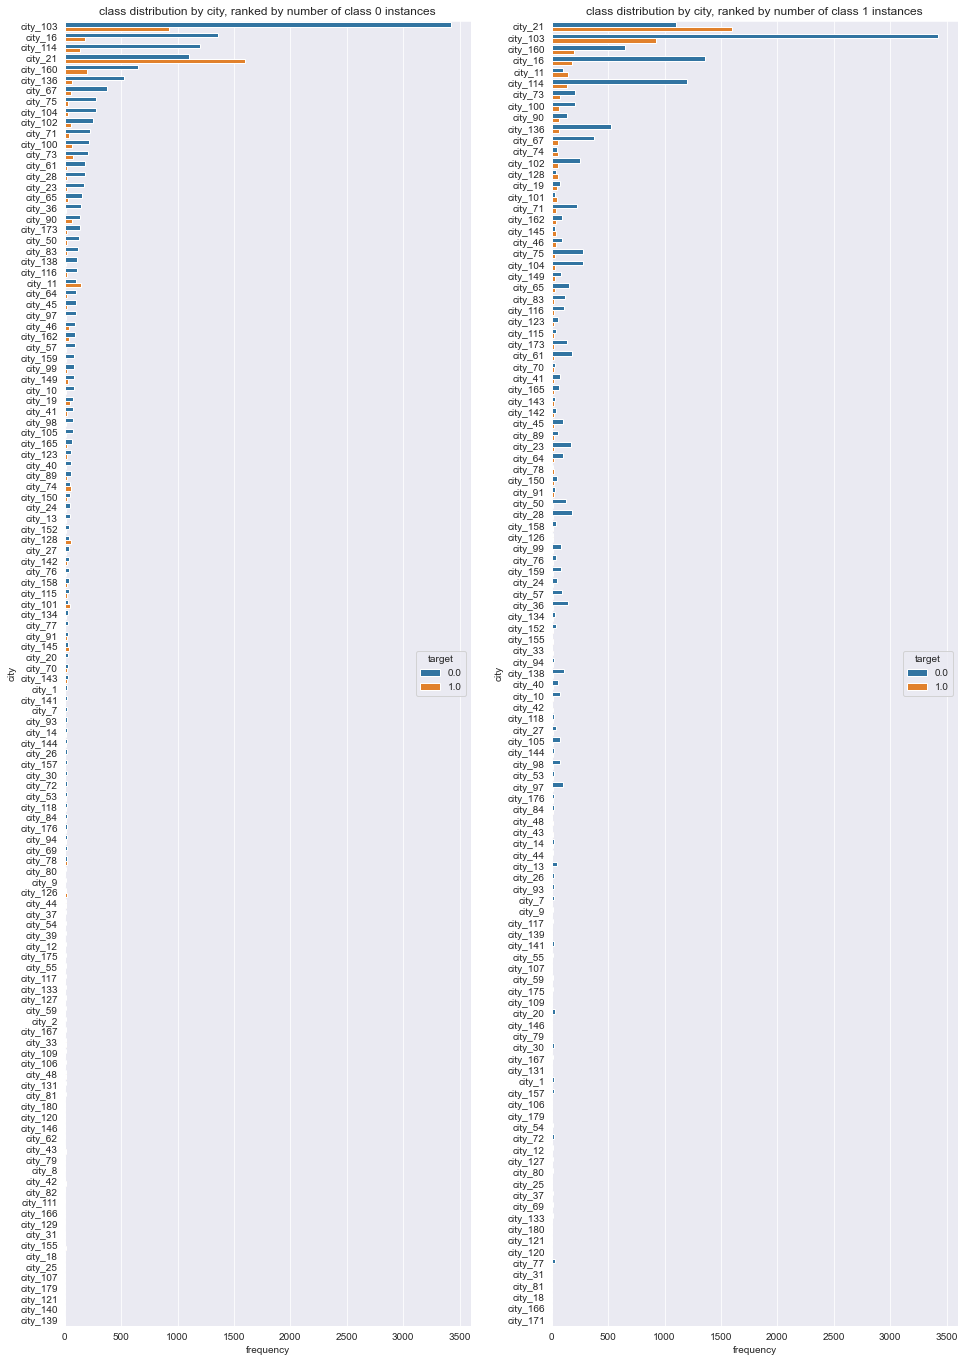

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(16, 24))
sns.countplot(y='city', 
              hue='target', 
              data=df, 
              ax=ax[0], 
              order = df[df['target'] == 0].city.value_counts().index)
sns.countplot(y='city', 
              hue='target', 
              data=df, 
              ax=ax[1], 
              order = df[df['target'] == 1].city.value_counts().index)
ax[0].set_xlabel('frequency')
ax[0].set_title('class distribution by city, ranked by number of class 0 instances')
ax[1].set_xlabel('frequency')
ax[1].set_title('class distribution by city, ranked by number of class 1 instances');

In [66]:
df1 = df[['city', 'target']].groupby('city').sum() / df[['city', 'target']].groupby('city').count()

In [76]:
df1.sort_values('target', ascending=False)

,target
city,
city_171,1.000000
city_139,0.800000
city_155,0.785714
city_42,0.692308
city_107,0.666667
...,...
city_129,0.000000
city_111,0.000000
city_82,0.000000


<AxesSubplot:xlabel='target', ylabel='city'>

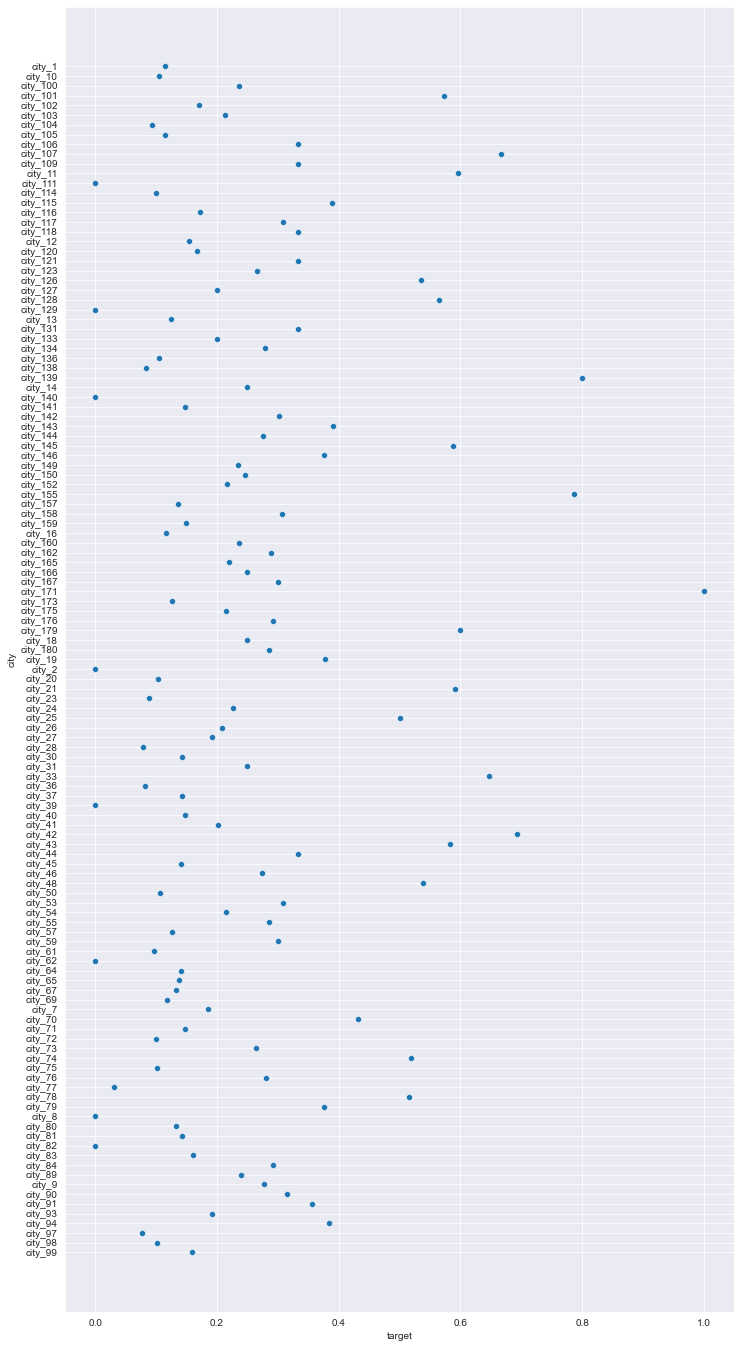

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(12, 24))
sns.scatterplot(data=df1, x='target', y=df1.index)

<AxesSubplot:xlabel='target', ylabel='city'>

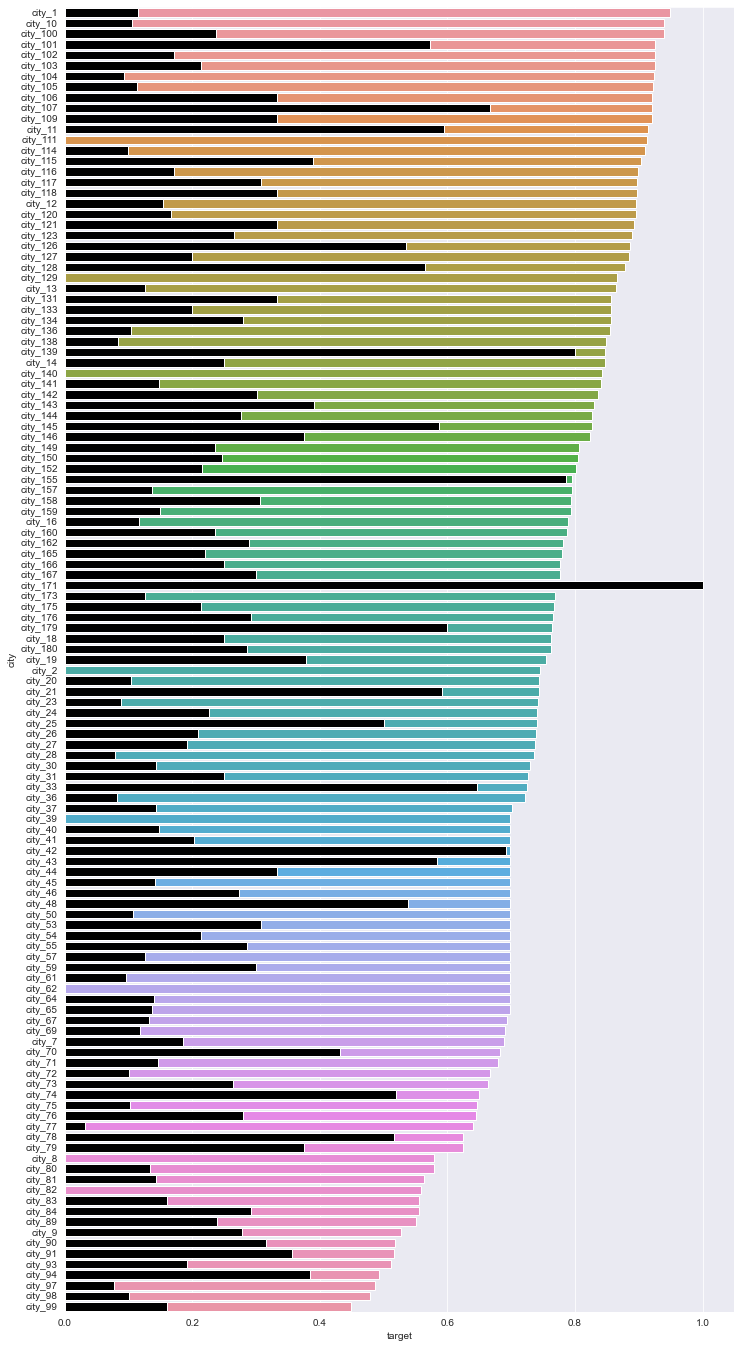

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(12, 24))
sns.barplot(ax=ax, 
            data=df, 
            y='city', 
            x='city_development_index', 
            order=df.sort_values(by='city_development_index', ascending=False).city.unique())
sns.barplot(ax=ax, data=df1, y=df1.index, x='target', color='black')

# Feature: `city_development_index`

In [4]:
df.city_development_index.describe()

count    19158.000000
mean         0.828848
std          0.123362
min          0.448000
25%          0.740000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

In [5]:
print(f'Percent of missing: {df.city_development_index.isnull().sum() / len(df):0.2f}')

Percent of missing: 0.00


In [6]:
df['target_label'] = np.where(df.target == 1, 'Looking for a job change', 'Not looking for job change')

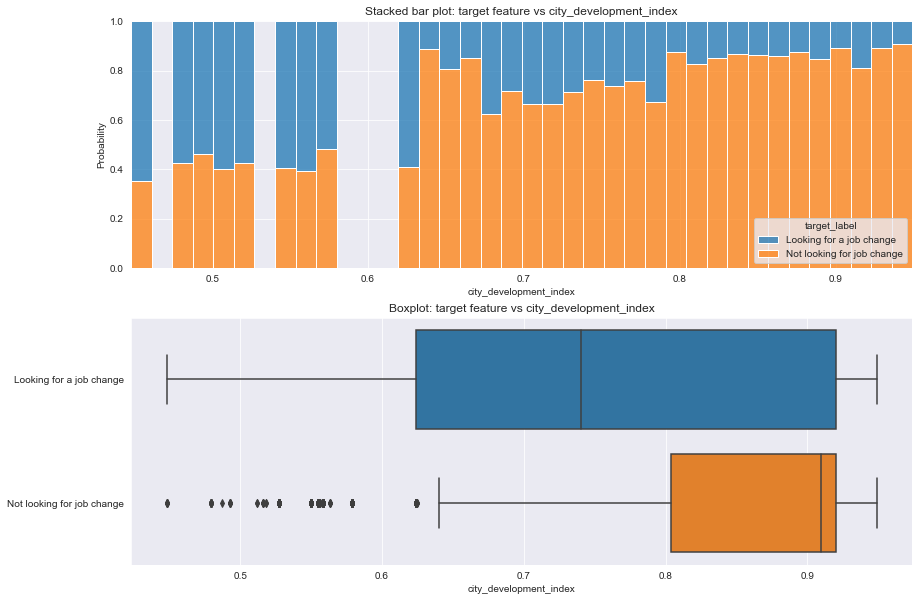

In [40]:
fig, ax = plt.subplots(2, 1, figsize=(14, 10), sharex=False)
sns.histplot(ax=ax[0], 
             data=df, 
             x='city_development_index', 
             hue='target_label', 
             bins='auto',
             multiple='fill', 
             stat='count', 
#              palette='pastel', 
             legend=True)
sns.boxplot(ax=ax[1], 
            data=df, 
            x='city_development_index', 
            y='target_label')
ax[0].set_ylabel('Probability')
ax[0].set_title('Stacked bar plot: target feature vs city_development_index')
ax[1].set_ylabel(None)
ax[1].set_title('Boxplot: target feature vs city_development_index');
plt.savefig('city_development_index.png')

# Feature: `gender`

In [41]:
print(f'Level of cardinality: {len(df.gender.unique())}')

Level of cardinality: 4


In [42]:
print(f'Percent of missing: {df.gender.isnull().sum() / len(df):0.4f}')

Percent of missing: 0.2353


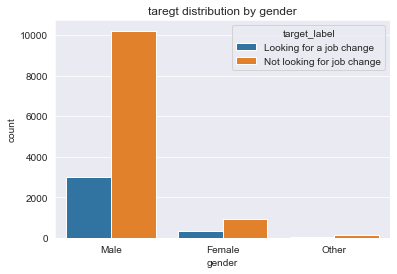

In [104]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.countplot(x='gender', hue='target_label', data=df, ax=ax)
ax.set_ylabel('count')
ax.set_title('taregt distribution by gender');
plt.savefig('gender1.png')

In [87]:
df2 = df[['gender', 'target']].groupby('gender').sum() / df[['gender', 'target']].groupby('gender').count()

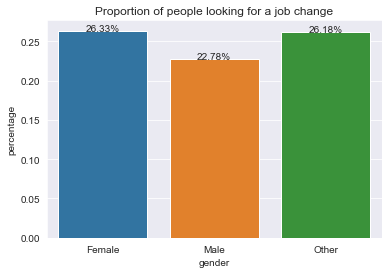

In [106]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.barplot(ax=ax, data=df2, x=df2.index, y='target')
ax.set_ylabel('percentage')
ax.set_title('Proportion of people looking for a job change')
show_values_on_bars(ax);
plt.savefig('gender2.png')

In [101]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}%'.format(p.get_height() * 100)
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [107]:
len(df[df.gender == 'Male']) / len(df.gender)

0.6901033510804886